In [36]:
from IPython.display import clear_output
import rebound
import matplotlib.pyplot as plt
import numpy as np
import random
import csv
import pandas as pd


In [15]:
# wooeeper
a_start = 2.515456864170004
e_start = 0.17038182764604992
omega_start = 3.5644092404577585

In [61]:
sim = rebound.Simulation()

# add sun
sim.move_to_com()
sim.integrator = "whfast"
sim.dt = .1
#simtime = 1e4 # 1 millione years

total_astroids = 1

starting_a = 0.
starting_e = 0.
final_a = 0.
final_e = 0.

mass = 1e-29
radius = a_start
omega = omega_start
ecc = e_start
    
# sun
sim.add(m=0.9999999999950272, x=-0.008669035216216899, y=0.0031140563797133693, z=0.00017700903203290386, vx=-0.00017842972567085554, vy=-0.0004942109647718484, vz=8.170411607613112e-06)
# jupiter
sim.add(m=0.0009547919099366768, x=4.717393707823112, y=-1.58629315260585, z=-0.0989587433278056, vx=0.13456873359546767, vy=0.4363713717691052, vz=-0.004821057409397645)
# mars
sim.add(m=3.2271560828978514e-07, x=-0.5195763051075928, y=-1.4079912951728626, z=-0.016864026009610615, vx=0.7953007114278168, vy=-0.2075756016137399, vz=-0.023844826829689417)
# add astroid
sim.add(m=mass,a=radius,omega=omega, e=ecc)



In [4]:
w = sim.getWidget()
w
#

Widget(N=4, count=2, height=200.0, orbit_data=b'\x92\x08\x0e\xbc2\x15L;\x80\x9b99\xb6~\xa6@}_F=\xf4\xe2\xb6@U\…

In [62]:
# first part
years = 600000
years = 300000
for i in range (int(years*(1/sim.dt))):
    sim.step()


# yeet part
years = 100000
years = 400000

# second part
#years = 350000
#yeart = 100000
# 400.000 oei oei
# 600.000 goners

a_list = []
time_list = []
e_list = []

jupiter_distance_list = []
mars_distance_list = []

save_rate = 1000

#skip shit
# for j in range (9722):
#     clear_output(wait=True)
#     print(j/(3917))
#     for i in range (int(years*(1/sim.dt)/save_rate)):
        
#         sim.step()

print_shit = int(years*(1/sim.dt)/save_rate)
print(print_shit)

for j in range (save_rate):
    clear_output(wait=True)
    print(j/(save_rate))
    for i in range (int(years*(1/sim.dt)/save_rate)):
                    
        sim.step()
        # second part
        a_list.append(sim.particles[3].a)
        e_list.append(sim.particles[3].e)
        time_list.append((j*print_shit)+i)

        jupiter_distance_list.append(np.sqrt((sim.particles[1].x-sim.particles[3].x)**2+(sim.particles[1].y-sim.particles[3].y)**2+(sim.particles[1].z-sim.particles[3].z)**2))
        mars_distance_list.append(np.sqrt((sim.particles[2].x-sim.particles[3].x)**2+(sim.particles[2].y-sim.particles[3].y)**2+(sim.particles[2].z-sim.particles[3].z)**2))

        
    #fig = rebound.OrbitPlot(sim)
    #plt.savefig('animate_save/plot_{}.png'.format(j+9722))

        


0.999


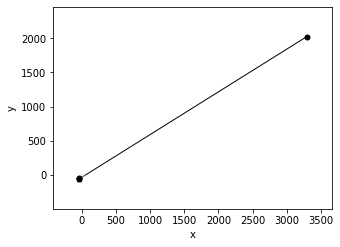

In [45]:
fig = rebound.OrbitPlot(sim)

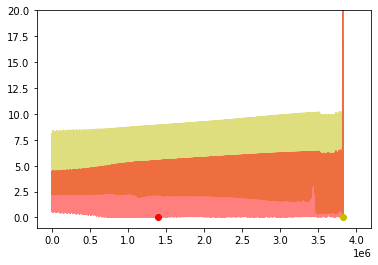

In [72]:

mars_min_dist = min(mars_distance_list)
mars_index = mars_distance_list.index(mars_min_dist)

jupiter_min_dist = min(jupiter_distance_list)
jupiter_index = jupiter_distance_list.index(jupiter_min_dist)

plt.plot(time_list,jupiter_distance_list,"y",alpha = 0.5)
plt.plot(time_list,mars_distance_list,"r",alpha = 0.5)

plt.plot(mars_index,mars_min_dist,"ro")
plt.plot(jupiter_index,jupiter_min_dist,"yo")

#plt.xlim(2e6,2.001e6)
plt.ylim([-1,20])
plt.show()




In [21]:
print(sim.particles[3].a)

-21.13860016254434


In [22]:
sim.status()

---------------------------------
REBOUND version:     	3.19.1
REBOUND built on:    	Jan 14 2022 11:24:53
Number of particles: 	4
Selected integrator: 	whfast
Simulation time:     	9.0000000026374171e+05
Current timestep:    	0.100000
---------------------------------
<rebound.particle.Particle object at 0x7f89353434c0, m=0.9999999999950272 x=-44.68358487966121 y=-69.80616007508912 z=3.2007560732842584 vx=0.00028403500804601684 vy=-0.0003569469290353554 vz=-2.7561971716585177e-06>
<rebound.particle.Particle object at 0x7f8935343640, m=0.0009547919099366768 x=-41.58407892295437 y=-65.88503552746805 z=3.1151631110210998 vx=-0.34927055922755557 vy=0.29264943741616467 vz=0.006602043071428933>
<rebound.particle.Particle object at 0x7f89353434c0, m=3.2271560828978514e-07 x=-45.202811761689134 y=-68.39521671957633 z=3.193739857126482 vx=-0.750615804461354 vy=-0.32996119766187365 vz=0.03789642058318795>
<rebound.particle.Particle object at 0x7f8935343640, m=1e-29 x=40228.902039442946 y=25109.5